In [1]:
import json
with open('tweets.json') as jfile:
    d=json.load(jfile)


In [2]:
print(len(d))

43347


In [3]:
first_pair = next(iter((d.items())) )
print(first_pair)

('1374140386071961602', {'tweet_author': 'Hematopoiesis News', 'tweet_text': '⚕️ Scientists conducted a Phase II study of acalabrutinib in patients with relapsed/refractory #CLL who were ibrutinib-intolerant, and found an overall response rate of 73%. \nhttps://t.co/eJ6m4QpC5P https://t.co/kuZz6ZO47r'})


In [4]:
import pandas as pd


In [5]:
data = pd.DataFrame.from_dict(d)

In [6]:
data=data.T

In [7]:
data.reset_index(inplace=True)

In [8]:
data.head()

,index,tweet_author,tweet_text
0,1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
1,1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2,1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
3,1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...
4,1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...


In [9]:
data.rename(columns={'index':'id'}, inplace=True)

In [10]:
data.head()

,id,tweet_author,tweet_text
0,1374140386071961602,Hematopoiesis News,⚕️ Scientists conducted a Phase II study of ac...
1,1374032432173842437,"Michael Wang, MD",This phase 2 Acalabrutinib-Venetoclax (AV) tri...
2,1373902876553048065,1stOncology,#NICE backs #AstraZenecas #Calquence for #CLL ...
3,1373656782367813635,Toby Eyre,#acalabrutinib is a valuable option in pts int...
4,1372941634334232586,Lymphoma Hub,NICE has recommended the use of acalabrutinib ...


In [11]:
data.to_csv('Data1.csv')

# word frequency

In [12]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(data.tweet_text.str)

in                        19288
of                        18518
#CLL                      17620
the                       13679
for                       13013
                          ...  
•1.5                          1
(2:30pmET)                    1
11:30amPT                     1
•Starts                       1
http://t.co/YzvK2n9UsZ        1
Length: 119578, dtype: int64

# Data Cleaning

In [13]:
import re

def clean_text(text):
    # remove URL
    text = re.sub('(\w+:\/\/\S+)', '',text)
     #Filter to allow only alphabets
    text = re.sub(r'[^a-zA-Z\w]', ' ', text)
    
#     #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
#     #Remove punctuations
#     text = re.sub(r'[?!.;:,#@-]', '', text)
    
    #Convert to lowercase to maintain consistency
    text = text.lower()
    
    
       
    return text

In [14]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{"don't", 'this', 'was', "weren't", "here's", 'being', 'am', 'hers', 'of', 'more', 'between', "you'd", 'what', 'i', 'his', 'here', 'are', 'she', "we've", 'yourselves', 'it', "haven't", 'not', 'is', 'than', 'against', 'does', 'since', 'most', 'because', 'an', "she'd", 'you', "aren't", "it's", "how's", 'about', 'your', 'were', 'do', 'that', 'there', 'in', 'www', 'up', 'from', 'ever', "wouldn't", 'then', 'my', 'should', 'for', 'some', 'having', 'as', 'the', 'yourself', 'few', 'such', 'their', 'where', "he'll", "we'd", 'r', 'like', 'who', "didn't", 'else', "wasn't", 'any', 'ours', 'under', 'myself', 'no', "they're", "you'll", 'once', 'however', 'herself', 'be', 'we', 'same', "i'd", 'a', 'just', 'can', 'whom', 'during', 'have', 'me', 'they', "when's", 'with', 'get', "who's", "i've", "you've", 'therefore', 'had', 'so', 'by', 'which', "won't", "where's", 'ought', 'has', 'only', 'all', "i'm", 'our', 'to', "she'll", 'k', "he's", 'shall', 'on', 'both', 'through', "couldn't", 'been', 'why', "why'

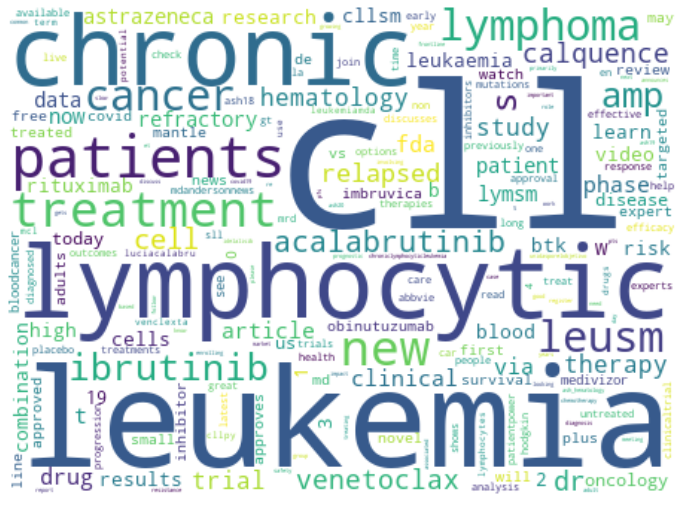

In [15]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = data.tweet_text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
word_freq

cll                           29163
leukemia                      20239
lymphocytic                   17457
chronic                       17177
patients                       8375
                              ...  
azd1208                           1
neurman                           1
membermondays                     1
breastcancerawarenessmonth        1
ptk2                              1
Length: 36219, dtype: int64

In [17]:
!pip install transformers


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from transformers import pipeline

In [19]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [20]:
p=classifier(data.tweet_text[0])

In [21]:
type(p)

list

In [22]:
p[0]['score']

0.9363403916358948

In [23]:
clean_text(data.tweet_text[0])

'   scientists conducted a phase ii study of acalabrutinib in patients with relapsed refractory  cll who were ibrutinib intolerant  and found an overall response rate of 73     '

In [24]:
df = []
i=0
for i in range(len(data.tweet_text)):
    str_text = str(data.tweet_text[i])
    df.append(clean_text(str_text))
    
    i+=1
    

In [25]:
df[:5]

['   scientists conducted a phase ii study of acalabrutinib in patients with relapsed refractory  cll who were ibrutinib intolerant  and found an overall response rate of 73     ',
 'this phase 2 acalabrutinib venetoclax  av  trial that is still in recruitment phase will study how well venetoclax and acalabrutinib works in mcl patients who either relapsed or non respondent to the initial therapy   ',
 ' nice backs  astrazenecas  calquence for  cll ',
 ' acalabrutinib is a valuable option in pts intolerant to  ibrutinib  further valuable data to help decision making in  cll   early view   haematologica ',
 'nice has recommended the use of acalabrutinib for patients with treatment nave chronic lymphocytic leukemia  find out more here   lymsm  lymphoma']

In [26]:
clean_df = pd.DataFrame(df)

In [27]:
clean_df.columns = ['tweet_text'] 
clean_df.head()

,tweet_text
0,scientists conducted a phase ii study of ac...
1,this phase 2 acalabrutinib venetoclax av tri...
2,nice backs astrazenecas calquence for cll
3,acalabrutinib is a valuable option in pts int...
4,nice has recommended the use of acalabrutinib ...


In [28]:
# import nltk
# from nltk.tokenize import word_tokenize
# def tokenize_text(text):
#     sent_token = word_tokenize(text)
#     return tokenize_text(text)

In [29]:
# tok_list = []
# i=0
# for i in range(len(clean_df.tweet_text)):
#     list1 = clean_df.tweet_text[i]
#     tok_list.append(tokenize(list1))
    
#     break

In [30]:
# tokenize_text(clean_df.tweet_text[0])

In [77]:
from nltk.tokenize import word_tokenize
# tok = word_tokenize("I am shailesh and this is my house")
# print(type(tok))

In [78]:
p_df = clean_df[0:5]
p_df

,tweet_text
0,scientists conducted a phase ii study of ac...
1,this phase 2 acalabrutinib venetoclax av tri...
2,nice backs astrazenecas calquence for cll
3,acalabrutinib is a valuable option in pts int...
4,nice has recommended the use of acalabrutinib ...


In [80]:
i=0
w = []
while i in range(len(clean_df)):
    w.append(word_tokenize(clean_df.tweet_text[i]))
    
    i+=1

In [81]:
len(w)

43347

In [82]:
len(clean_df)

43347

# 2nd part

In [85]:
type(word_freq)

pandas.core.series.Series

In [92]:
freq_words_list = word_freq.keys().to_list()

In [93]:
freq_words_list[0:5]

['cll', 'leukemia', 'lymphocytic', 'chronic', 'patients']

In [446]:
w[0]

['scientists',
 'conducted',
 'a',
 'phase',
 'ii',
 'study',
 'of',
 'acalabrutinib',
 'in',
 'patients',
 'with',
 'relapsed',
 'refractory',
 'cll',
 'who',
 'were',
 'ibrutinib',
 'intolerant',
 'and',
 'found',
 'an',
 'overall',
 'response',
 'rate',
 'of',
 '73']

In [447]:
index_li= []
for i in range(len(freq_words_list)):
    temp_li = []
    for j in range(len(w)):
        if freq_words_list[i] in w[j]:
            temp_li.append(j)
    index_li.append(temp_li)
    
print(index_li[0])    

[0, 2, 3, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 29, 33, 38, 40, 46, 50, 51, 55, 58, 59, 60, 62, 73, 77, 79, 80, 85, 88, 95, 97, 100, 105, 115, 118, 122, 124, 143, 144, 150, 156, 161, 165, 171, 172, 177, 179, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 204, 205, 208, 210, 212, 218, 219, 220, 225, 226, 237, 239, 241, 242, 243, 245, 253, 267, 268, 274, 275, 277, 280, 281, 282, 285, 289, 292, 293, 294, 295, 305, 307, 321, 324, 329, 331, 333, 338, 388, 392, 402, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 417, 418, 419, 423, 424, 425, 429, 430, 431, 432, 437, 438, 439, 440, 441, 442, 447, 449, 450, 451, 452, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 469, 471, 472, 473, 475, 477, 478, 481, 483, 484, 485, 492, 493, 497, 498, 499, 500, 503, 509, 510, 511, 512, 513, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 529, 537, 540, 541, 542, 543, 544, 545, 564, 578, 661, 664, 666, 667, 669, 674, 679, 680, 681, 

In [451]:
[len(a) for a in index_li]

[26122,
 18462,
 16507,
 16838,
 8021,
 5499,
 5494,
 3722,
 3588,
 4208,
 3921,
 3502,
 3217,
 3670,
 2940,
 2574,
 2733,
 2480,
 2387,
 2180,
 2183,
 2215,
 2069,
 1791,
 1725,
 1711,
 1601,
 1580,
 1621,
 1603,
 1525,
 1506,
 1419,
 1423,
 1466,
 1455,
 1368,
 1269,
 1257,
 1272,
 1229,
 1120,
 1129,
 1197,
 1154,
 1158,
 1135,
 1091,
 1088,
 1053,
 1073,
 1052,
 1004,
 991,
 1026,
 1006,
 972,
 971,
 906,
 874,
 887,
 909,
 863,
 590,
 857,
 890,
 839,
 808,
 572,
 796,
 794,
 749,
 781,
 769,
 773,
 753,
 743,
 766,
 772,
 718,
 744,
 714,
 717,
 721,
 705,
 651,
 701,
 690,
 684,
 678,
 673,
 644,
 638,
 635,
 615,
 631,
 637,
 629,
 645,
 640,
 639,
 623,
 400,
 619,
 606,
 606,
 594,
 590,
 599,
 604,
 579,
 575,
 587,
 589,
 587,
 582,
 543,
 573,
 573,
 581,
 565,
 562,
 577,
 555,
 569,
 567,
 449,
 544,
 397,
 546,
 519,
 539,
 530,
 538,
 536,
 504,
 512,
 462,
 486,
 491,
 523,
 504,
 501,
 510,
 497,
 505,
 495,
 485,
 492,
 498,
 497,
 488,
 485,
 464,
 437,
 456,
 459,

In [104]:
len(word_freq)

36219

In [459]:
df[1724]

'the data presented at  asco2020 by  acertapharma showed  acalabrutinib  a second generation bruton tyrosine kinase  btk  inhibitor  helped  cll patients live longer without progression of the  disease  '

In [463]:
# ab = [[1,2,3],[2,1,4],[3,4,6],[7,3,9]]
# rt= [1,4,3]   

In [462]:
# ge =[]
# for i in range(len(rt)):
#     we = []
#     for j in range(len(ab)):
#         if rt[i] in ab[j]:
#             we.append(j)
#     ge.append(we)  
# print(ge)

In [460]:
# hh=[]
# kk=[]
# for i in range(len(rt)):
#     kk=[]
#     for j in range(len(ab)):
#         if rt[i] in ab[j]:
#             kk.append(j)
#             print(f'i={i} & j={j}')
#             print(True)
#             print(kk)
#     hh.append(kk)
# print(hh)

In [461]:
# print(hh)

In [465]:
len(index_li)

36219

In [466]:
len(freq_words_list)

36219

In [485]:
first_freq_word_author = data['tweet_author'].iloc[index_li[0]]

In [486]:
first_freq_word_author[:5]

0    Hematopoiesis News
2           1stOncology
3             Toby Eyre
5          David Ledger
8        Graham Collins
Name: tweet_author, dtype: object

In [488]:
auth_list1=[]
for i in range(len(index_li)):
    auth_list2 = []
    for j in index_li[i]:
        auth_list2.append(data['tweet_author'].iloc[j])
        
    auth_list1.append(auth_list2)

In [524]:
auth_list1[0]

['Hematopoiesis News',
 '1stOncology',
 'Toby Eyre',
 'David Ledger',
 'Graham Collins',
 'CLL Ireland',
 'Mice Ideas',
 'Farooq A Wandroo',
 'Leukaemia Care',
 'PHARMABOX.IN',
 'Pharma Trader',
 'Everything Pharma',
 'IJPSonline',
 'Iceberg Vision',
 'PharmaTimes',
 'Paperbirds_Hematology',
 'Pharma News',
 'CLL Ireland',
 'Toby Eyre',
 'Paperbirds_Hematology',
 'Trip Database',
 'Kartos Therapeutics',
 'Paperbirds_Hematology',
 'Paperbirds_Hematology',
 'Tom Henry, MBA, RPh, CPh',
 'Patient Worthy',
 'Paperbirds_Hematology',
 'Bita Fakhri',
 'Oncology Learning Network',
 'Oncology Learning Network',
 'OncLive.com',
 'TrialSite News',
 'Lymphoma Hub',
 'Blood Advances',
 'Silas Inman',
 'OncLive.com',
 'TrialSite News',
 'Paperbirds_Hematology',
 'Taro Shiga',
 'BioCentury',
 'OncLive.com',
 'HemOnc Today',
 'Calgary Herald',
 'Biotech & Tech Stock Focus',
 'Paperbirds_Hematology',
 'Devdiscourse',
 'Shifting Wealth',
 'dough',
 'Josekun',
 'Golden Casino News',
 'Devdiscourse',
 'Cis

In [492]:
freq_word_author = pd.DataFrame(auth_list1[:10])

In [502]:
freq_word_author=freq_word_author.T

In [520]:
# freq_word_author.columns = [objective]

In [521]:
freq_word_author=freq_word_author.T

In [522]:
freq_word_author

,cll,leukemia,lymphocytic,chronic,patients,treatment,new,lymphoma,cancer,leusm
0,Hematopoiesis News,Lymphoma Hub,Lymphoma Hub,Lymphoma Hub,Hematopoiesis News,Lymphoma Hub,CLL Ireland,Lymphoma Hub,HealthWatch,Paperbirds_Hematology
1,1stOncology,Paperbirds_Hematology,European Pharmaceutical Review,European Pharmaceutical Review,"Michael Wang, MD",Leukaemia Care,HealthWatch,Lymphoma Papers,Thiago Carvalho,Paperbirds_Hematology
2,Toby Eyre,Cardio-Targets,Leukaemia Care,Leukaemia Care,Lymphoma Hub,HealthWatch,Paperbirds_Hematology,Lymphoma Hub,NetCancer,Paperbirds_Hematology
3,David Ledger,Lymphoma Papers,HealthWatch,HealthWatch,European Pharmaceutical Review,Lymphoma Hub,CLL Ireland,Paperbirds_Hematology,DMGAZ,Paperbirds_Hematology
4,Graham Collins,Paperbirds_Hematology,Paperbirds_Hematology,Paperbirds_Hematology,Graham Collins,Trip Database,pharmaphorum,Lymphoma Papers,Market Intelligence: Healthcare,Paperbirds_Hematology
...,...,...,...,...,...,...,...,...,...,...
26117,Joy is a Lifestyle,None,None,None,None,None,None,None,None,None
26118,Micheál 🇮🇪,None,None,None,None,None,None,None,None,None
26119,Joy is a Lifestyle,None,None,None,None,None,None,None,None,None
26120,𝓒𝓻𝓲𝔃𝔃𝔂 𝓟𝓮𝓻𝓻𝔂🌹,None,None,None,None,None,None,None,None,None


In [543]:
auth_list1[:10]

[['Hematopoiesis News',
  '1stOncology',
  'Toby Eyre',
  'David Ledger',
  'Graham Collins',
  'CLL Ireland',
  'Mice Ideas',
  'Farooq A Wandroo',
  'Leukaemia Care',
  'PHARMABOX.IN',
  'Pharma Trader',
  'Everything Pharma',
  'IJPSonline',
  'Iceberg Vision',
  'PharmaTimes',
  'Paperbirds_Hematology',
  'Pharma News',
  'CLL Ireland',
  'Toby Eyre',
  'Paperbirds_Hematology',
  'Trip Database',
  'Kartos Therapeutics',
  'Paperbirds_Hematology',
  'Paperbirds_Hematology',
  'Tom Henry, MBA, RPh, CPh',
  'Patient Worthy',
  'Paperbirds_Hematology',
  'Bita Fakhri',
  'Oncology Learning Network',
  'Oncology Learning Network',
  'OncLive.com',
  'TrialSite News',
  'Lymphoma Hub',
  'Blood Advances',
  'Silas Inman',
  'OncLive.com',
  'TrialSite News',
  'Paperbirds_Hematology',
  'Taro Shiga',
  'BioCentury',
  'OncLive.com',
  'HemOnc Today',
  'Calgary Herald',
  'Biotech & Tech Stock Focus',
  'Paperbirds_Hematology',
  'Devdiscourse',
  'Shifting Wealth',
  'dough',
  'Joseku

In [541]:
objective2.shape

(10, 1)

In [497]:
# auth = pd.DataFrame(data['tweet_author'].iloc[:36219])

In [545]:
objective2 = freq_words_list[:10]
objective2

['cll',
 'leukemia',
 'lymphocytic',
 'chronic',
 'patients',
 'treatment',
 'new',
 'lymphoma',
 'cancer',
 'leusm']

In [546]:
auth_10_top_list = auth_list1[:10]

# sentiment analysis

In [596]:
senti = classifier(list(clean_df['tweet_text'][index_li[:10][0][0]])[:5])

In [600]:
senti[0]

{'label': 'POSITIVE', 'score': 0.7481210231781006}

In [575]:
type(clean_df['tweet_text'][index_li[:10][0]])

pandas.core.series.Series

In [547]:
auth_dict = dict(zip(objective2,auth_10_top_list))

In [595]:
len(list(clean_df['tweet_text'][index_li[:10][0]]))

26122

In [3]:
import pandas as pd
user_dict = {12: {'Category 1': {'att_1': 1, 'att_2': 'whatever'},
                  'Category 2': {'att_1': 23, 'att_2': 'another'}},
             15: {'Category 1': {'att_1': 10, 'att_2': 'foo'},
                  'Category 2': {'att_1': 30, 'att_2': 'bar'}}}

jjj=pd.DataFrame.from_dict({(i,j): user_dict[i][j] 
                           for i in user_dict.keys() 
                           for j in user_dict[i].keys()},
                       orient='index')

In [6]:
jjj

att_1     att_2
12 Category 1      1  whatever
   Category 2     23   another
15 Category 1     10       foo
   Category 2     30       bar

In [19]:
jjj.columns

Index(['att_1', 'att_2'], dtype='object')

In [21]:
(i,j): user_dict[i][j] for i in user_dict.keys() for j in user_dict[i].keys()

SyntaxError: only single target (not tuple) can be annotated (3119244879.py, line 1)